In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle
plt.ion()

In [2]:
from chitti import pprint
from chitti.nlp import space_punctuation, remove_punctuation

In [3]:
path = '../data/News_Category_Dataset_v2.json'


In [4]:
df = pd.read_json(path, lines=True)
print(df.shape)


(200853, 6)


In [5]:
df.head(5)


,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


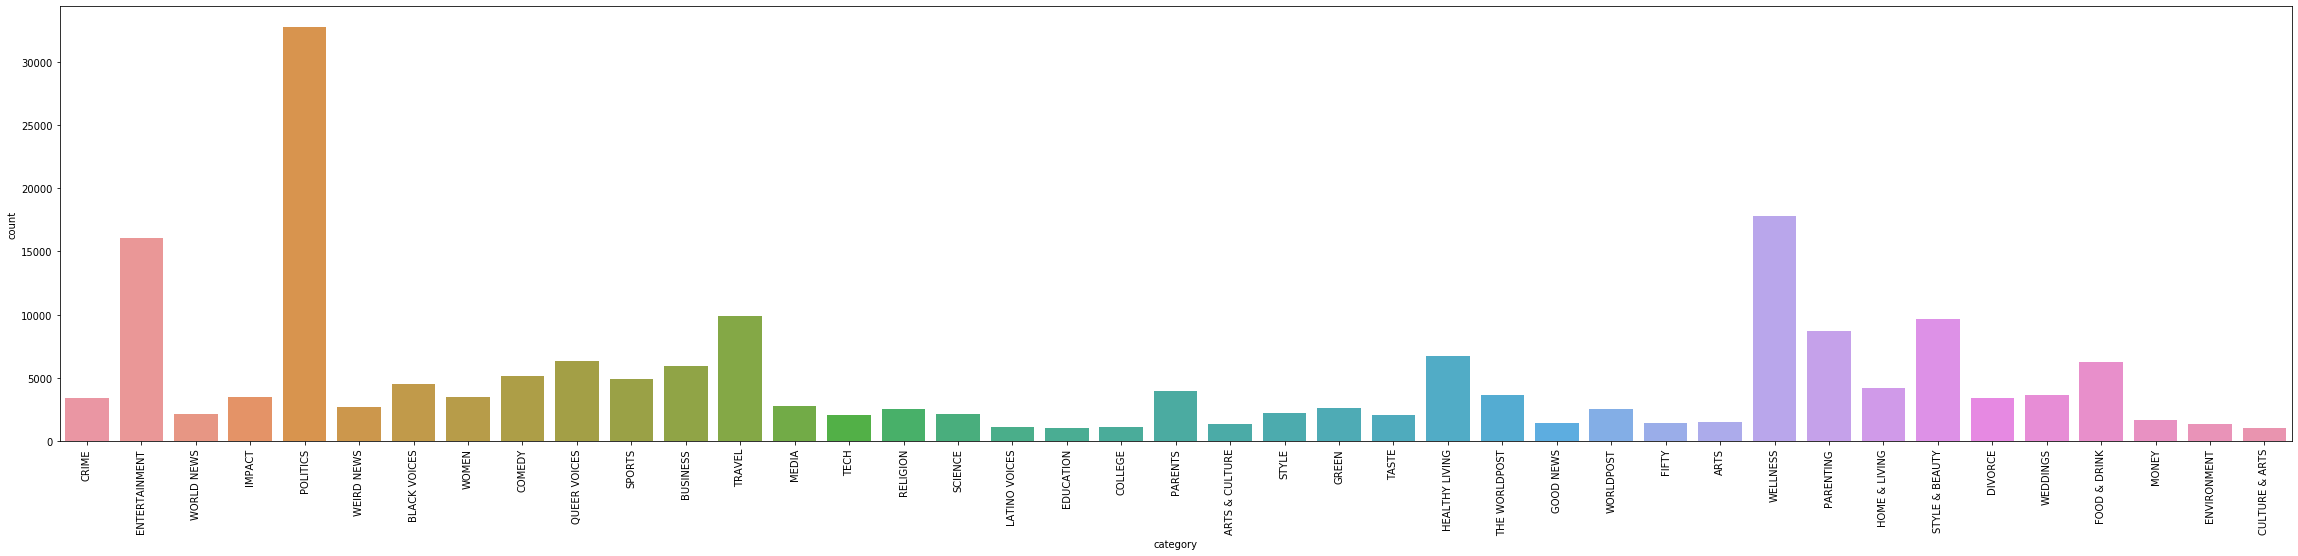

In [6]:
plt.figure(figsize=(40, 8))
sns.countplot(x='category', data=df)
plt.xticks(rotation='vertical')
plt.show()


In [7]:
df['short_description'] = df['short_description'].str.lower()

In [8]:
import re
def remove_punctuation_(text):
    text = re.sub('[!\"#$%&\'()*+,^_`{|}~\-/:;<=>?@[\\]]', r' ', text)
    text = re.sub('[“”]', r' ', text)
    
    text = ''.join(text)
    text = re.sub(' +',' ',text)
    return text

df['short_description_space_punct'] = df['short_description'].apply(space_punctuation)
df['short_description_remove_punct'] = df['short_description'].apply(remove_punctuation_)

In [9]:
text = '“if you’re a girl you have to play the game.”'
text = re.sub('[“”]', r' ', text)
print(text)


 if you’re a girl you have to play the game. 


In [10]:
pprint(df['short_description_remove_punct'].tolist()[:5])

she left her husband. he killed their children. just another day in america.

of course it has a song.

the actor and his longtime girlfriend anna eberstein tied the knot in a civil ceremony.

the actor gives dems an ass kicking for not fighting hard enough against donald trump.

the dietland actress said using the bags is a really cathartic therapeutic moment. 



In [40]:
df['words_len'] = df['short_description'].str.split().str.len()
df['sent_len'] = df['short_description'].apply(lambda x: len(x.split('. ')))



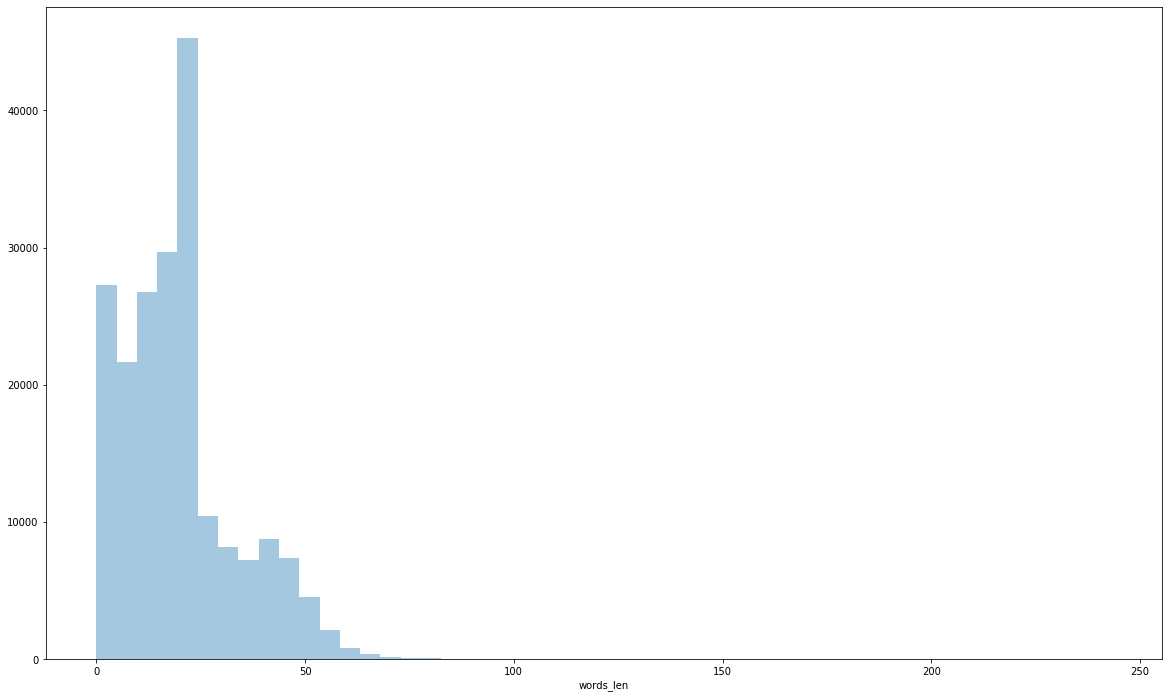

In [41]:
plt.figure(figsize=(20, 12))
sns.distplot(df['words_len'], kde=False)


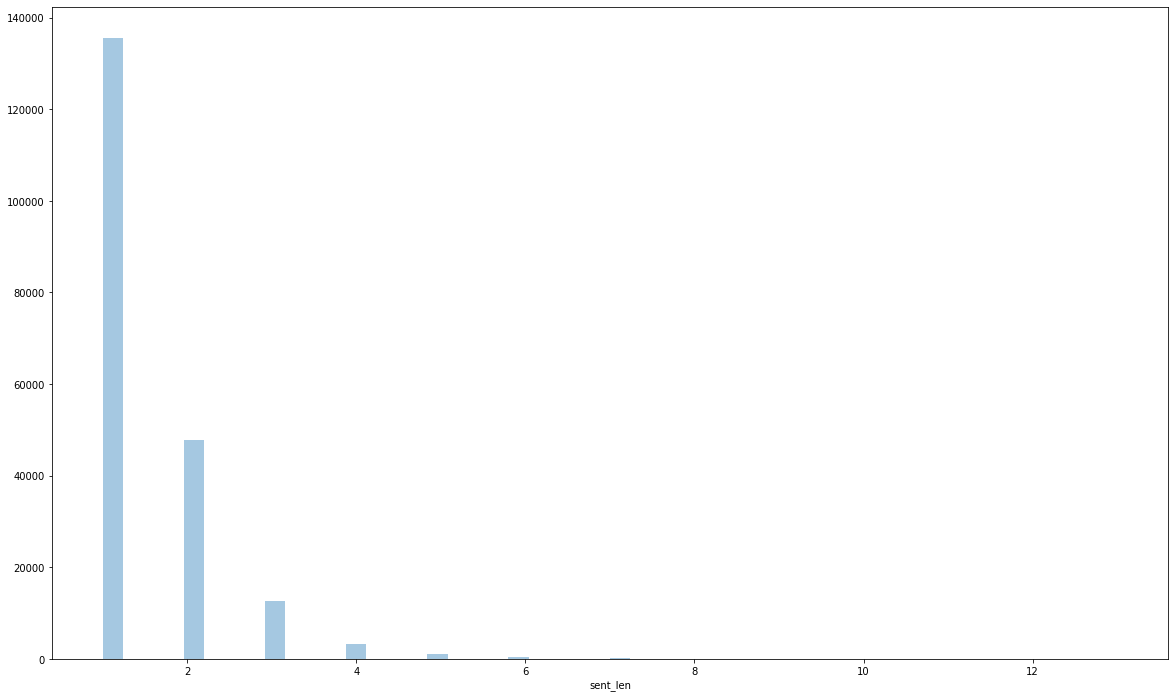

In [42]:
plt.figure(figsize=(20, 12))
sns.distplot(df['sent_len'], kde=False)



In [43]:
df['category'] = df['category'].str.lower()
df['category'].value_counts()


politics          32739
wellness          17827
entertainment     16058
travel             9887
style & beauty     9649
parenting          8677
healthy living     6694
queer voices       6314
food & drink       6226
business           5937
comedy             5175
sports             4884
black voices       4528
home & living      4195
parents            3955
the worldpost      3664
weddings           3651
women              3490
impact             3459
divorce            3426
crime              3405
media              2815
weird news         2670
green              2622
worldpost          2579
religion           2556
style              2254
science            2178
world news         2177
taste              2096
tech               2082
money              1707
arts               1509
fifty              1401
good news          1398
arts & culture     1339
environment        1323
college            1144
latino voices      1129
culture & arts     1030
education          1004
Name: category, 

In [55]:
cats = ['politics', 'entertainment']
dd = df[df['category'].isin(cats)]
print(dd.shape)

(48797, 10)


In [56]:
dd = dd[dd['sent_len']>= 2]
print(dd.shape)

(8730, 10)


In [57]:
dd[['sent_len', 'short_description']].head(4)

,sent_len,short_description
36,3,the chinese exclusion act barely gets mentione...
63,4,godlessness. too many doors in schools. ritali...
84,2,co-star nick offerman also seemed on board... ...
109,2,"""we should be grieving with jessica walter. th..."


In [58]:
def train_val_split(dfs, tcol='category', scol='short_description_remove_punct'):
    train = []
    val = []
    targets = dfs[tcol].unique()
    for target in targets:
        sents = dfs[dfs[tcol] == target][scol].tolist()
        shuffle(sents)
        
        temp = [(sent, target) for sent in sents]
        n = len(temp)
        k = int(0.8*n)
        
        train.extend(temp[:k])
        val.extend(temp[k:])
    return train, val
    
        

In [59]:
train, val = train_val_split(dd)

In [60]:
train_df = pd.DataFrame(train, columns=['text', 'labels'])
val_df = pd.DataFrame(val, columns=['text', 'labels'])

In [61]:
train_df.to_csv('../data/train.csv')
val_df.to_csv('../data/valid.csv')

In [62]:
val_df['labels'].value_counts()


politics         1233
entertainment     514
Name: labels, dtype: int64

In [63]:
train_df['labels'].value_counts()

politics         4929
entertainment    2054
Name: labels, dtype: int64